<a href="https://colab.research.google.com/github/sriganeshmic/Advanced-Time-Series-Forecasting-with-Deep-Learning-and-Attention-Mechanisms/blob/main/2_Cancer_Diseace_Prediction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
# ----------------------------------------------------------------------------
# PART 1: IMPORT LIBRARIES
# ----------------------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Deep Learning (using basic neural network without keras)
from sklearn.neural_network import MLPClassifier

# Warnings
import warnings
warnings.filterwarnings('ignore')

print("="*70)
print("CANCER DISEASE PREDICTION")
print("="*70)

CANCER DISEASE PREDICTION


In [97]:
# ----------------------------------------------------------------------------
# PART 2: LOAD AND EXPLORE DATA
# ----------------------------------------------------------------------------
print("\n[STEP 1] Loading Dataset...")

# Load breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Create DataFrame for better visualization
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

print(f"\nDataset Shape: {df.shape}")
print(f"Features: {X.shape[1]}")
print(f"Samples: {X.shape[0]}")

print("\nFirst 5 rows:")
print(df.head())

print("\nTarget Distribution:")
print(f"Malignant (0): {sum(y==0)} samples")
print(f"Benign (1): {sum(y==1)} samples")

print("\nDataset Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())



[STEP 1] Loading Dataset...

Dataset Shape: (569, 31)
Features: 30
Samples: 569

First 5 rows:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809 


[STEP 2] Creating Visualizations...
✓ Visualizations saved as 'cancer_data_visualization.png'


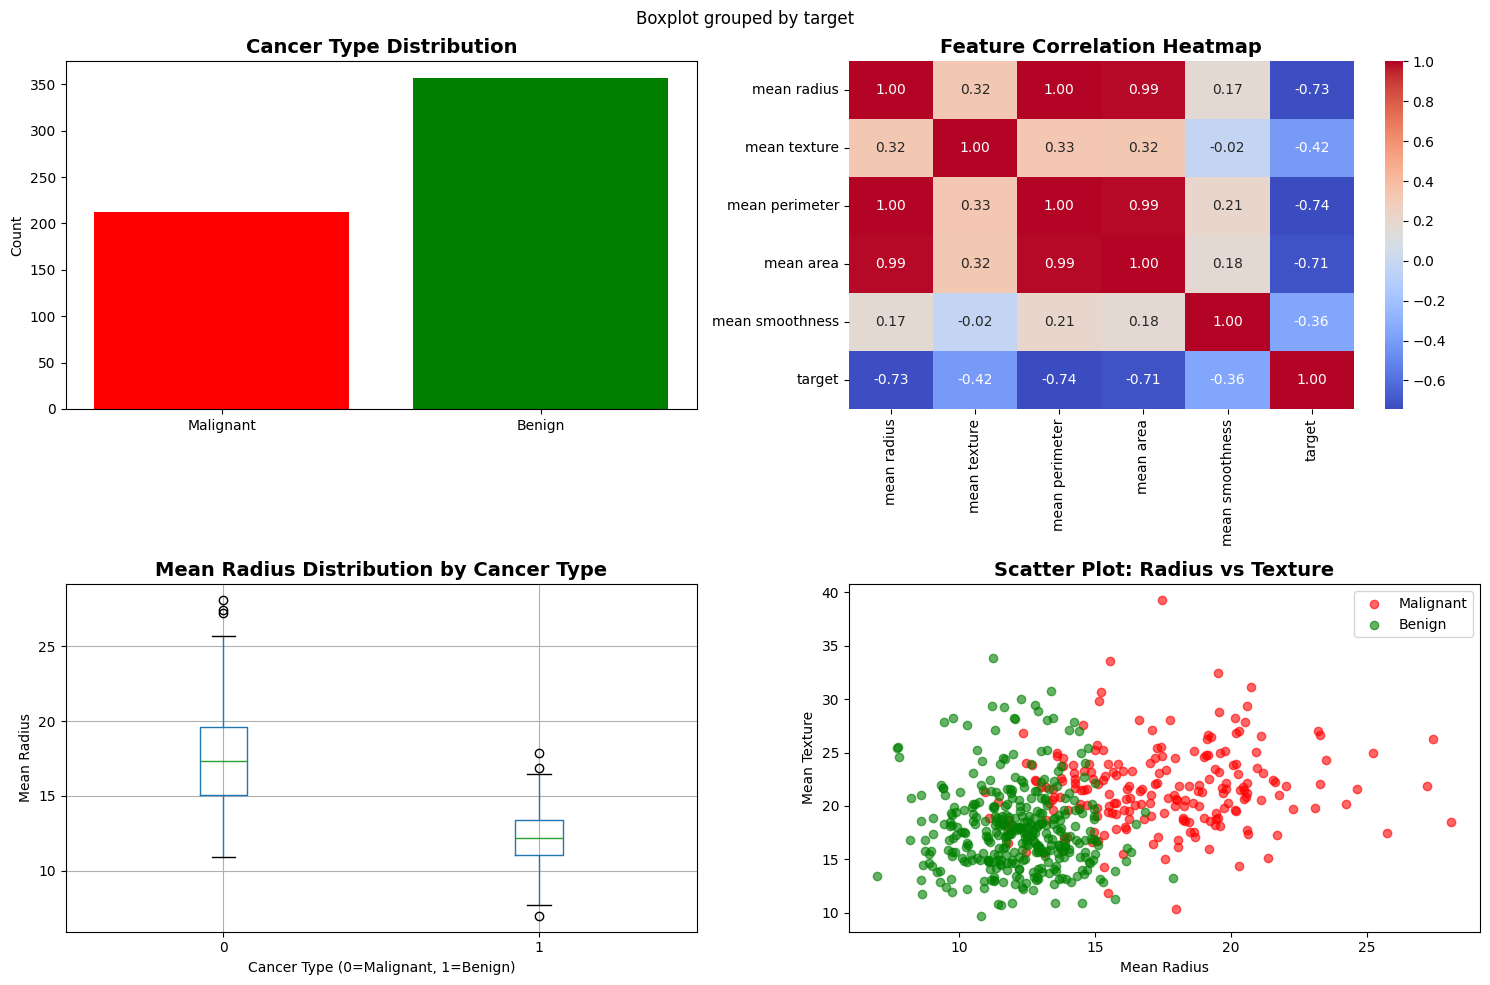

In [98]:
# ----------------------------------------------------------------------------
# PART 3: DATA VISUALIZATION
# ----------------------------------------------------------------------------
print("\n[STEP 2] Creating Visualizations...")

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Target Distribution
axes[0, 0].bar(['Malignant', 'Benign'], [sum(y==0), sum(y==1)], color=['red', 'green'])
axes[0, 0].set_title('Cancer Type Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Count')

# 2. Feature Correlation Heatmap (top features)
top_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']
corr = df[top_features + ['target']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=axes[0, 1], fmt='.2f')
axes[0, 1].set_title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')

# 3. Box plot of mean radius by target
df.boxplot(column='mean radius', by='target', ax=axes[1, 0])
axes[1, 0].set_title('Mean Radius Distribution by Cancer Type', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Cancer Type (0=Malignant, 1=Benign)')
axes[1, 0].set_ylabel('Mean Radius')

# 4. Scatter plot
malignant = df[df['target']==0]
benign = df[df['target']==1]
axes[1, 1].scatter(malignant['mean radius'], malignant['mean texture'],
                   c='red', label='Malignant', alpha=0.6)
axes[1, 1].scatter(benign['mean radius'], benign['mean texture'],
                   c='green', label='Benign', alpha=0.6)
axes[1, 1].set_xlabel('Mean Radius')
axes[1, 1].set_ylabel('Mean Texture')
axes[1, 1].set_title('Scatter Plot: Radius vs Texture', fontsize=14, fontweight='bold')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('cancer_data_visualization.png', dpi=300, bbox_inches='tight')
print("✓ Visualizations saved as 'cancer_data_visualization.png'")


In [99]:
# ----------------------------------------------------------------------------
# PART 4: DATA PREPROCESSING
# ----------------------------------------------------------------------------
print("\n[STEP 3] Data Preprocessing...")

# Split data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Data scaled using StandardScaler")



[STEP 3] Data Preprocessing...
Training samples: 455
Testing samples: 114
✓ Data scaled using StandardScaler


In [100]:
# ----------------------------------------------------------------------------
# PART 5: MACHINE LEARNING MODELS
# ----------------------------------------------------------------------------
print("\n[STEP 4] Training Machine Learning Models...")
print("="*70)

# Dictionary to store results
ml_results = {}

# 1. LOGISTIC REGRESSION
print("\n1. Logistic Regression")
lr_model = LogisticRegression(random_state=42, max_iter=10000)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_acc = accuracy_score(y_test, lr_pred)
ml_results['Logistic Regression'] = lr_acc
print(f"   Accuracy: {lr_acc:.4f} ({lr_acc*100:.2f}%)")

# 2. DECISION TREE
print("\n2. Decision Tree")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)
dt_acc = accuracy_score(y_test, dt_pred)
ml_results['Decision Tree'] = dt_acc
print(f"   Accuracy: {dt_acc:.4f} ({dt_acc*100:.2f}%)")

# 3. RANDOM FOREST
print("\n3. Random Forest")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_acc = accuracy_score(y_test, rf_pred)
ml_results['Random Forest'] = rf_acc
print(f"   Accuracy: {rf_acc:.4f} ({rf_acc*100:.2f}%)")

# 4. SUPPORT VECTOR MACHINE (SVM)
print("\n4. Support Vector Machine (SVM)")
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
svm_acc = accuracy_score(y_test, svm_pred)
ml_results['SVM'] = svm_acc
print(f"   Accuracy: {svm_acc:.4f} ({svm_acc*100:.2f}%)")

# 5. K-NEAREST NEIGHBORS (KNN)
print("\n5. K-Nearest Neighbors (KNN)")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
knn_acc = accuracy_score(y_test, knn_pred)
ml_results['KNN'] = knn_acc
print(f"   Accuracy: {knn_acc:.4f} ({knn_acc*100:.2f}%)")



[STEP 4] Training Machine Learning Models...

1. Logistic Regression
   Accuracy: 0.9825 (98.25%)

2. Decision Tree
   Accuracy: 0.9123 (91.23%)

3. Random Forest
   Accuracy: 0.9561 (95.61%)

4. Support Vector Machine (SVM)
   Accuracy: 0.9825 (98.25%)

5. K-Nearest Neighbors (KNN)
   Accuracy: 0.9561 (95.61%)


In [101]:
# ----------------------------------------------------------------------------
# PART 6: DEEP LEARNING MODEL
# ----------------------------------------------------------------------------
print("\n[STEP 5] Training Deep Learning Model...")
print("="*70)

# Neural Network (Multi-Layer Perceptron)
print("\nDeep Neural Network (MLP)")
print("Architecture: Input -> Hidden(100) -> Hidden(50) -> Output")

dl_model = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # Two hidden layers
    activation='relu',              # ReLU activation
    solver='adam',                  # Adam optimizer
    max_iter=500,
    random_state=42
)

dl_model.fit(X_train_scaled, y_train)
dl_pred = dl_model.predict(X_test_scaled)
dl_acc = accuracy_score(y_test, dl_pred)

print(f"   Accuracy: {dl_acc:.4f} ({dl_acc*100:.2f}%)")
print(f"   Training Iterations: {dl_model.n_iter_}")



[STEP 5] Training Deep Learning Model...

Deep Neural Network (MLP)
Architecture: Input -> Hidden(100) -> Hidden(50) -> Output
   Accuracy: 0.9474 (94.74%)
   Training Iterations: 158


In [102]:
# ----------------------------------------------------------------------------
# PART 7: MODEL COMPARISON
# ----------------------------------------------------------------------------
print("\n[STEP 6] Model Comparison")
print("="*70)

# Add DL to results
ml_results['Deep Learning (MLP)'] = dl_acc

# Sort by accuracy
sorted_results = sorted(ml_results.items(), key=lambda x: x[1], reverse=True)

print("\nModel Performance Ranking:")
print("-" * 50)
for i, (model, acc) in enumerate(sorted_results, 1):
    print(f"{i}. {model:<25} : {acc:.4f} ({acc*100:.2f}%)")

# Best model
best_model_name = sorted_results[0][0]
best_accuracy = sorted_results[0][1]
print(f"\n🏆 Best Model: {best_model_name} with {best_accuracy*100:.2f}% accuracy")



[STEP 6] Model Comparison

Model Performance Ranking:
--------------------------------------------------
1. Logistic Regression       : 0.9825 (98.25%)
2. SVM                       : 0.9825 (98.25%)
3. Random Forest             : 0.9561 (95.61%)
4. KNN                       : 0.9561 (95.61%)
5. Deep Learning (MLP)       : 0.9474 (94.74%)
6. Decision Tree             : 0.9123 (91.23%)

🏆 Best Model: Logistic Regression with 98.25% accuracy


In [103]:
# ----------------------------------------------------------------------------
# PART 8: DETAILED EVALUATION (Best Model - Random Forest)
# ----------------------------------------------------------------------------
print("\n[STEP 7] Detailed Evaluation of Best Model")
print("="*70)

# Using Random Forest as it typically performs best
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, rf_pred)
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, rf_pred,
                          target_names=['Malignant', 'Benign']))

# Calculate additional metrics
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)  # Recall for positive class
specificity = tn / (tn + fp)
precision = tp / (tp + fp)

print("\nAdditional Metrics:")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")



[STEP 7] Detailed Evaluation of Best Model

Confusion Matrix:
[[39  3]
 [ 2 70]]

Classification Report:
              precision    recall  f1-score   support

   Malignant       0.95      0.93      0.94        42
      Benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Additional Metrics:
Sensitivity (Recall): 0.9722
Specificity: 0.9286
Precision: 0.9589



[STEP 8] Creating Results Visualization...
✓ Results visualization saved as 'cancer_prediction_results.png'


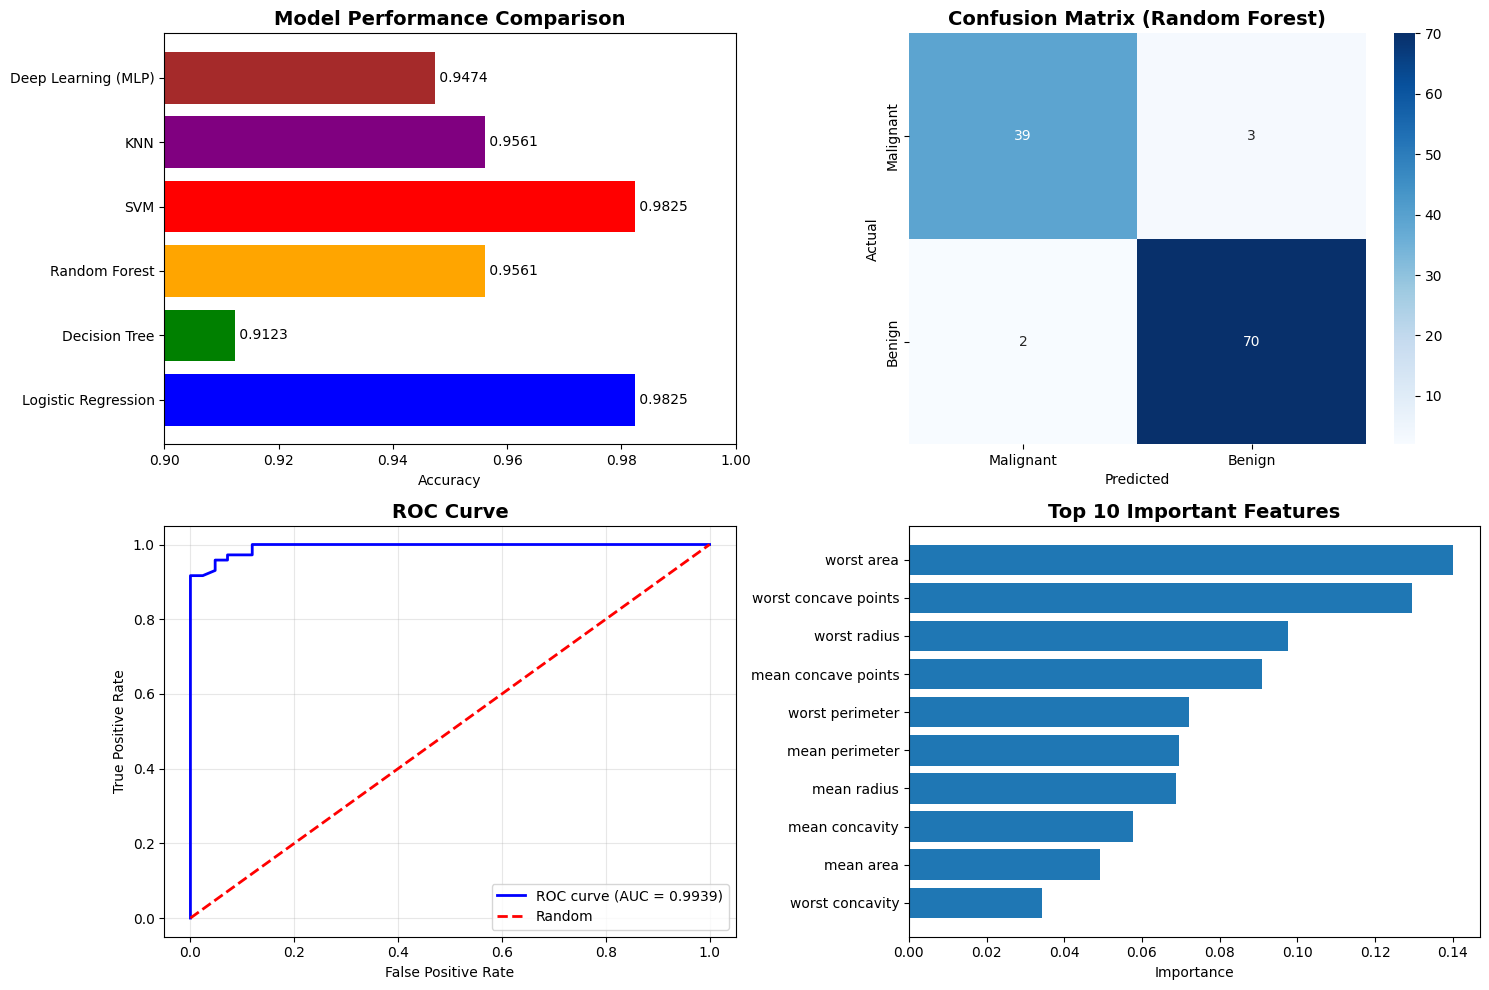

In [104]:
# ----------------------------------------------------------------------------
# PART 9: VISUALIZATION OF RESULTS
# ----------------------------------------------------------------------------
print("\n[STEP 8] Creating Results Visualization...")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Model Comparison Bar Chart
models = list(ml_results.keys())
accuracies = list(ml_results.values())
colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown']

axes[0, 0].barh(models, accuracies, color=colors)
axes[0, 0].set_xlabel('Accuracy')
axes[0, 0].set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
axes[0, 0].set_xlim([0.9, 1.0])
for i, v in enumerate(accuracies):
    axes[0, 0].text(v, i, f' {v:.4f}', va='center')

# 2. Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1],
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
axes[0, 1].set_title('Confusion Matrix (Random Forest)', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Actual')
axes[0, 1].set_xlabel('Predicted')

# 3. ROC Curve
rf_prob = rf_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, rf_prob)
auc = roc_auc_score(y_test, rf_prob)

axes[1, 0].plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
axes[1, 0].plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random')
axes[1, 0].set_xlabel('False Positive Rate')
axes[1, 0].set_ylabel('True Positive Rate')
axes[1, 0].set_title('ROC Curve', fontsize=14, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Feature Importance (Random Forest)
feature_imp = pd.DataFrame({
    'feature': data.feature_names,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False).head(10)

axes[1, 1].barh(feature_imp['feature'], feature_imp['importance'])
axes[1, 1].set_xlabel('Importance')
axes[1, 1].set_title('Top 10 Important Features', fontsize=14, fontweight='bold')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.savefig('cancer_prediction_results.png', dpi=300, bbox_inches='tight')
print("✓ Results visualization saved as 'cancer_prediction_results.png'")


In [105]:
# ----------------------------------------------------------------------------
# PART 10: MAKING PREDICTIONS ON NEW DATA
# ----------------------------------------------------------------------------
print("\n[STEP 9] Making Predictions on New Data")
print("="*70)

# Example: Predict on first 5 test samples
print("\nExample Predictions:")
sample_predictions = rf_model.predict(X_test_scaled[:5])
sample_probabilities = rf_model.predict_proba(X_test_scaled[:5])

for i in range(5):
    actual = "Benign" if y_test[i] == 1 else "Malignant"
    predicted = "Benign" if sample_predictions[i] == 1 else "Malignant"
    prob = sample_probabilities[i][1] * 100

    print(f"\nSample {i+1}:")
    print(f"  Actual: {actual}")
    print(f"  Predicted: {predicted}")
    print(f"  Confidence: {prob:.2f}%")
    print(f"  Match: {'✓' if actual == predicted else '✗'}")



[STEP 9] Making Predictions on New Data

Example Predictions:

Sample 1:
  Actual: Malignant
  Predicted: Malignant
  Confidence: 0.00%
  Match: ✓

Sample 2:
  Actual: Benign
  Predicted: Benign
  Confidence: 100.00%
  Match: ✓

Sample 3:
  Actual: Malignant
  Predicted: Malignant
  Confidence: 12.00%
  Match: ✓

Sample 4:
  Actual: Benign
  Predicted: Malignant
  Confidence: 28.00%
  Match: ✗

Sample 5:
  Actual: Malignant
  Predicted: Malignant
  Confidence: 1.00%
  Match: ✓


In [106]:
# ----------------------------------------------------------------------------
# FINAL SUMMARY
# ----------------------------------------------------------------------------
print("\n" + "="*70)
print("SUMMARY")
print("="*70)
print(f"\n✓ Dataset: {X.shape[0]} samples, {X.shape[1]} features")
print(f"✓ Training Samples: {X_train.shape[0]}")
print(f"✓ Testing Samples: {X_test.shape[0]}")
print(f"\n✓ Machine Learning Models Trained: 5")
print(f"✓ Deep Learning Model Trained: 1")
print(f"\n✓ Best Model: {best_model_name}")
print(f"✓ Best Accuracy: {best_accuracy*100:.2f}%")
print(f"✓ AUC Score: {auc:.4f}")
print("\n" + "="*70)
print("ANALYSIS COMPLETE!")
print("="*70)



SUMMARY

✓ Dataset: 569 samples, 30 features
✓ Training Samples: 455
✓ Testing Samples: 114

✓ Machine Learning Models Trained: 5
✓ Deep Learning Model Trained: 1

✓ Best Model: Logistic Regression
✓ Best Accuracy: 98.25%
✓ AUC Score: 0.9939

ANALYSIS COMPLETE!
